In [1]:

import pandas as pd

# Load the dataset
file_path =("C:\\Users\\sathe\\OneDrive\\Desktop\\MAJOR PROJECT\\global-data-on-sustainable-energy (1).csv")
data= pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())

# Display the first few rows of the dataset
print("\nFirst Few Rows:")
print(data.head(3))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fo

In [2]:
data.shape

(3649, 21)

In [3]:
# Check for missing values in all columns
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values.T)

Missing values in each column:
Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_

In [4]:
data['Access to electricity (% of population)'] = data['Access to electricity (% of population)'].interpolate(method='linear')
data['Electricity from fossil fuels (TWh)'] = data['Electricity from fossil fuels (TWh)'].interpolate(method='linear')
data['Low-carbon electricity (% electricity)'] = data['Low-carbon electricity (% electricity)'].interpolate(method='linear')
data['gdp_per_capita'] = data['gdp_per_capita'].fillna(data['gdp_per_capita'].median())
data['gdp_growth'] = data['gdp_growth'].fillna(data['gdp_growth'].mean())

In [5]:
# Check for missing values in all columns
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                                0
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                    0
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                 0
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


In [7]:
# Assuming data is loaded into a DataFrame `data`
# data = pd.read_csv('your_data.csv') # Uncomment if you need to load from a file

# Example features and target based on your dataset
features = ['Access to electricity (% of population)', 'gdp_per_capita', 'Electricity from fossil fuels (TWh)']
target = 'Primary energy consumption per capita (kWh/person)'

# Extract features and target
X = data[features].values
y = data[target].values


In [8]:
# Initialize RobustScaler for scaling the features and target variable
scaler = RobustScaler()

# Scale features
X_scaled = scaler.fit_transform(X)

# Scale target variable
y_scaler = RobustScaler()
y_scaled = y_scaler.fit_transform(y.reshape(-1, 1))  # Reshaping y to be 2D for scaling


In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape data for LSTM (samples, time steps, features)
X_train_scaled = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_scaled = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


In [11]:
from keras.layers import Input

# Define the LSTM model
model = Sequential()

# Use Input layer to define the shape
model.add(Input(shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))

# Add LSTM layer
model.add(LSTM(50, activation='relu'))

# Output layer for regression task
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')



In [12]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)


Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1.1402 - val_loss: 0.7864
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7977 - val_loss: 0.6756
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6586 - val_loss: 0.6580
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6490 - val_loss: 0.6285
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6019 - val_loss: 0.6219
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5489 - val_loss: 0.5926
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5772 - val_loss: 0.5649
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5682 - val_loss: 0.5595
Epoch 9/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5428 - val_loss: 0.5507
Epoch 10/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5296 - val_loss: 0.5441
Epoch 11/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6139 - val_loss: 0.5358
Epoch 12/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4832 - val_lo

In [13]:
# Make predictions on training and testing data
train_predict = model.predict(X_train_scaled)
test_predict = model.predict(X_test_scaled)


92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [14]:
# Inverse scaling for predictions and actual values

# For train predictions
train_predict_rescaled = y_scaler.inverse_transform(train_predict)

# For actual train values
y_train_actual = y_scaler.inverse_transform(y_train.reshape(-1, 1))

# For test predictions
test_predict_rescaled = y_scaler.inverse_transform(test_predict)

# For actual test values
y_test_actual = y_scaler.inverse_transform(y_test.reshape(-1, 1))


In [15]:
# Calculate MAE and RMSE for both training and testing data
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Calculate MAE and RMSE for training data
train_mae = mean_absolute_error(y_train_actual, train_predict_rescaled)
train_rmse = math.sqrt(mean_squared_error(y_train_actual, train_predict_rescaled))

# Calculate MAE and RMSE for testing data
test_mae = mean_absolute_error(y_test_actual, test_predict_rescaled)
test_rmse = math.sqrt(mean_squared_error(y_test_actual, test_predict_rescaled))

# Print results
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')


Train MAE: 11603.594237489748
Test MAE: 12417.185911790893
Train RMSE: 22069.954993138665
Test RMSE: 22100.46031988417


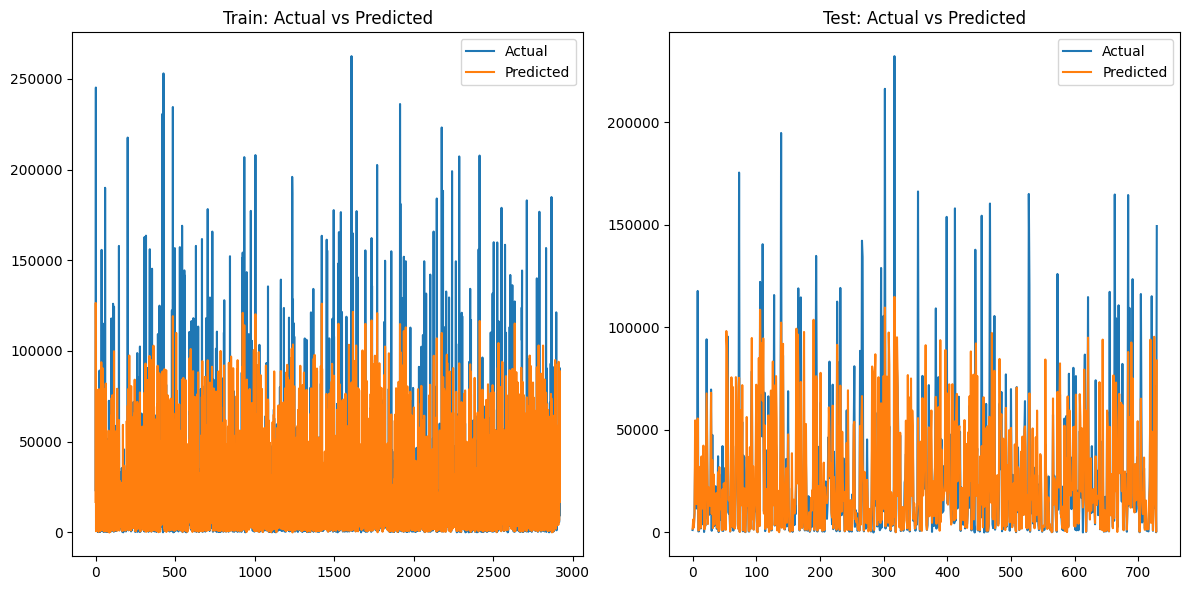

In [16]:
# Plot predictions vs actual values for train and test data

# Train predictions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(y_train_actual, label='Actual')
plt.plot(train_predict_rescaled, label='Predicted')
plt.title('Train: Actual vs Predicted')
plt.legend()

# Test predictions
plt.subplot(1, 2, 2)
plt.plot(y_test_actual, label='Actual')
plt.plot(test_predict_rescaled, label='Predicted')
plt.title('Test: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()
